# Evaluate standart benchmarks

Benchmarks Single-Phase Flow

- Poiseuille flow in a tube
- Flow between parallel plates
- Couette flow



In [2]:
## HEADER ## 
import numpy as np
import os, sys, glob
import matplotlib.pyplot as plt

In [7]:
# Import py modules to handle .vtu files
sys.path.append('/scratch/local1/krach/data/00_processing/daves_py_modules/')
sys.path.append('/home/david/Arbeit/data/00_processing/daves_py_modules/')
import readwrite
import modify
import vtk_tools

In [34]:
# Global Path
# global_path = ''
global_path = '/media/david/Data1/SPH_Simulation_Data/SinglephaseFlow_Benchmarks/'

In [39]:
# define colorbar
cm = plt.cm.get_cmap('RdYlBu')

## Poiseuille Flow
Convergence, discretisation, analytical solution

In [44]:
# Simulation Parameters
bf = 

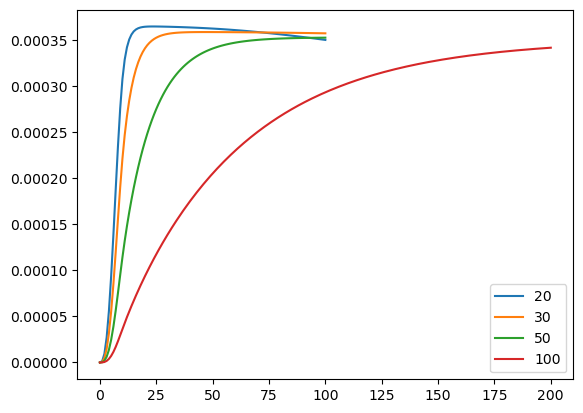

In [40]:
simulations_res = [
                20, 
                30, 
                50, 
                100
]

path_poiseuille = '01_poiseuille'
logfiles_poiseuille = [
    'poiseuille_flow_20_32_32_vs_5e-05_run.log',
    'poiseuille_flow_30_42_42_vs_3.3333333333333335e-05_run.log',
    'poiseuille_flow_50_62_62_vs_2e-05_run.log',
    'poiseuille_flow_100_112_112_vs_1e-05_run.log'
]

for i in range(len(simulations_res)):
    conv_data = np.genfromtxt(f'{global_path}{path_poiseuille}/{logfiles_poiseuille[i]}', skip_header = 1)[:, -2]
    number_fparticles = np.genfromtxt(f'{global_path}{path_poiseuille}/{logfiles_poiseuille[i]}', skip_header = 1)[-1, -3]
    norm_conv_data = np.divide(conv_data, number_fparticles)
    plt.plot(norm_conv_data, label = f'{simulations_res[i]}')
    plt.legend()
plt.show()

read_vtk.py: Read vtk-file: /media/david/Data1/SPH_Simulation_Data/SinglephaseFlow_Benchmarks/01_poiseuille/poiseuille_flow_20_32_32_vs_5e-05_run/poiseuille_flow_20_32_32_vs_5e-05_run_10000.vtu
read_vtk.py: Read Positions: Number of loaded points 20480
read_vtk.py: Load field Pressure
read_vtk.py: Load field Velocity x
read_vtk.py: Load field Velocity y


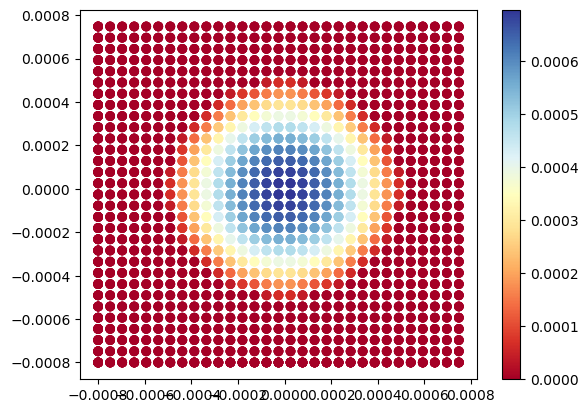

read_vtk.py: Read vtk-file: /media/david/Data1/SPH_Simulation_Data/SinglephaseFlow_Benchmarks/01_poiseuille/poiseuille_flow_100_112_112_vs_1e-05_run/poiseuille_flow_100_112_112_vs_1e-05_run_20000.vtu
read_vtk.py: Read Positions: Number of loaded points 1254400
read_vtk.py: Load field Pressure
read_vtk.py: Load field Velocity x
read_vtk.py: Load field Velocity y


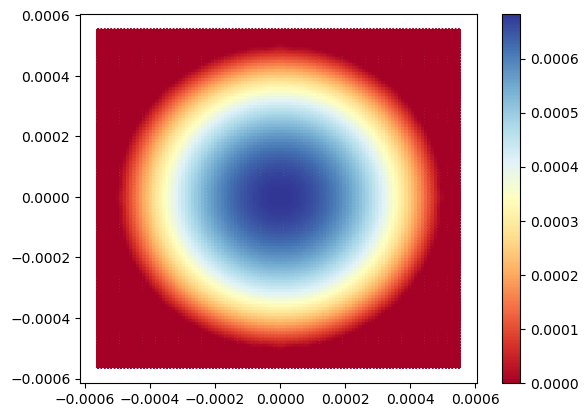

In [43]:
# Comparison with a analytical solution
vtufiles =  [
    'poiseuille_flow_20_32_32_vs_5e-05_run/poiseuille_flow_20_32_32_vs_5e-05_run_10000.vtu',
    'poiseuille_flow_30_42_42_vs_3.3333333333333335e-05_run/poiseuille_flow_30_42_42_vs_3.3333333333333335e-05_run_10000.vtu',
    'poiseuille_flow_50_62_62_vs_2e-05_run/poiseuille_flow_50_62_62_vs_2e-05_run_10000.vtu',
    'poiseuille_flow_100_112_112_vs_1e-05_run/poiseuille_flow_100_112_112_vs_1e-05_run_20000.vtu'
]

data20 = vtk_tools.openvtu(f'{global_path}{path_poiseuille}/{vtufiles[0]}', ['Pressure', 'Velocity x', 'Velocity y'])

# print(data20['Points'])
tdata_points_y = []
tdata_points_z = []
tdata_vels = []
for i in range(data20['Points'].shape[0]):
    if data20['Points'][i, 0] < 0.0001  and data20['Points'][i, 0] > -0.0001:
        tdata_points_y.append(data20['Points'][i, 1])
        tdata_points_z.append(data20['Points'][i, 2])
        tdata_vels.append(data20['Velocity x'][i])

im = plt.scatter(tdata_points_y, tdata_points_z, c = tdata_vels, cmap = cm)
plt.colorbar(im)
plt.show()
plt.close()

data100 = vtk_tools.openvtu(f'{global_path}{path_poiseuille}/{vtufiles[3]}', ['Pressure', 'Velocity x', 'Velocity y'])

tdata_points_y = []
tdata_points_z = []
tdata_vels = []
for i in range(data100['Points'].shape[0]):
    if data100['Points'][i, 0] < 0.0001  and data100['Points'][i, 0] > -0.0001:
        tdata_points_y.append(data100['Points'][i, 1])
        tdata_points_z.append(data100['Points'][i, 2])
        tdata_vels.append(data100['Velocity x'][i])

im = plt.scatter(tdata_points_y, tdata_points_z, c = tdata_vels, s = 2, cmap = cm)
plt.colorbar(im)
plt.show()
plt.close()

## Parallel Plates 
Convergence, discretisation and analytical solution


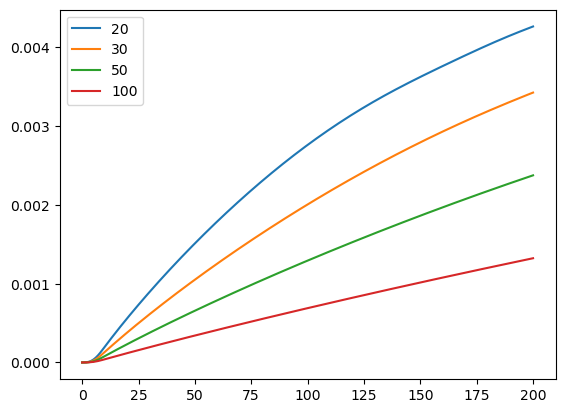

In [4]:
simulations_res = [
                    20, 
                    30, 
                    50, 
                    100
]

path_plates = '02_parallel_plates'
logfiles_plates = [
    'parallel_plates_20_32_17_vs_5e-05_run.log',
    'parallel_plates_30_42_17_vs_3.3333333333333335e-05_run.log',
    'parallel_plates_50_62_17_vs_2e-05_run.log',
    'parallel_plates_100_112_17_vs_1e-05_run.log'
]

for i in range(len(simulations_res)):
    conv_data = np.genfromtxt(f'{path_plates}/{logfiles_plates[i]}', skip_header = 1)[:, -2]
    number_fparticles = np.genfromtxt(f'{path_plates}/{logfiles_plates[i]}', skip_header = 1)[-1, -3]
    norm_conv_data = np.divide(conv_data, number_fparticles)
    plt.plot(norm_conv_data, label = f'{simulations_res[i]}')
    plt.legend()
plt.show()

## Couette Flow
Convergence, discretisation, and analytical solution

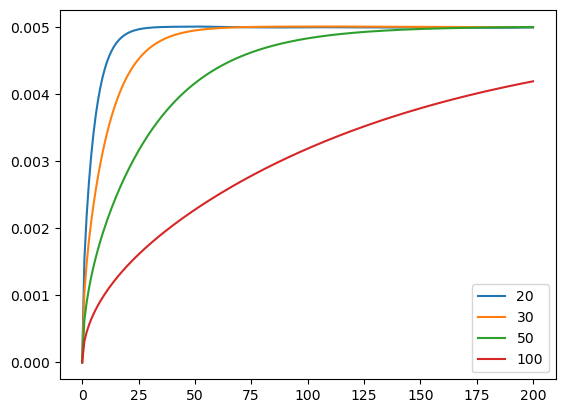

In [9]:
simulations_res = [
                    20, 
                    30, 
                    50, 
                    100
]

path_couette = '03_couette_flow'
logfiles_couette = [
    'couette_flow_20_28_17_vs_5e-05_run.log',
    'couette_flow_30_38_17_vs_3.3333333333333335e-05_run.log',
    'couette_flow_50_58_17_vs_2e-05_run.log',
    'couette_flow_100_108_17_vs_1e-05_run.log'
]

for i in range(len(simulations_res)):
    conv_data = np.genfromtxt(f'{path_couette}/{logfiles_couette[i]}', skip_header = 1)[:, -2]
    number_fparticles = np.genfromtxt(f'{path_couette}/{logfiles_couette[i]}', skip_header = 1)[-1, -3]
    norm_conv_data = np.divide(conv_data, number_fparticles)
    plt.plot(norm_conv_data, label = f'{simulations_res[i]}')
    plt.legend()
plt.show()

## Channel Flow
Convergence, discretisation, and analytical solution

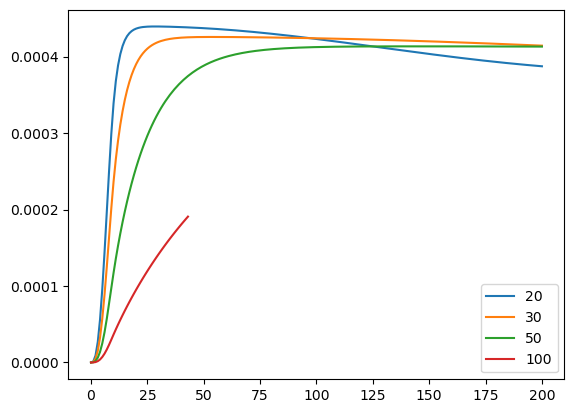

In [10]:
simulations_res = [
                    20, 
                    30, 
                    50, 
                    100
]

path_channel = '04_channel_flow'
logfiles_channel = [
    'channel_flow_20_32_32_vs_5e-05_run.log',
    'channel_flow_30_42_42_vs_3.3333333333333335e-05_run.log',
    'channel_flow_50_62_62_vs_2e-05_run.log',
    'channel_flow_100_112_112_vs_1e-05_run.log'
]

for i in range(len(simulations_res)):
    conv_data = np.genfromtxt(f'{path_channel}/{logfiles_channel[i]}', skip_header = 1)[:, -2]
    number_fparticles = np.genfromtxt(f'{path_channel}/{logfiles_channel[i]}', skip_header = 1)[-1, -3]
    norm_conv_data = np.divide(conv_data, number_fparticles)
    plt.plot(norm_conv_data, label = f'{simulations_res[i]}')
    plt.legend()
plt.show()